
# DBSCAN Clustering – Non-linear Data (Make Moons)

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

## 1. Generate Dataset

In [3]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X[:5]

array([[ 0.62251913, -0.37210134],
       [ 1.90426932, -0.13630295],
       [-0.06943128,  0.45611698],
       [ 0.93389863,  0.23748283],
       [ 1.18035952, -0.49084692]])

## 2. Data Scaling

In [4]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 0.14036805, -1.26261004],
       [ 1.6138101 , -0.78648207],
       [-0.65506683,  0.40974193],
       [ 0.49831585, -0.03172773],
       [ 0.78163614, -1.50238304]])


## 3. Apply DBSCAN
- **eps**: neighborhood radius  
- **min_samples**: minimum points to form a dense region


In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
clusters[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])


## 4. Visualization
Noise points are labeled as **-1** and shown in black.

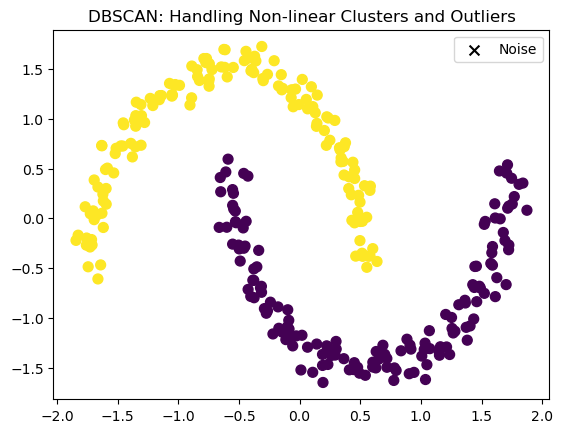

In [6]:

plt.scatter(
    X_scaled[clusters != -1, 0],
    X_scaled[clusters != -1, 1],
    c=clusters[clusters != -1],
    cmap='viridis',
    s=50
)

plt.scatter(
    X_scaled[clusters == -1, 0],
    X_scaled[clusters == -1, 1],
    c='black',
    marker='x',
    s=50,
    label='Noise'
)

plt.title('DBSCAN: Handling Non-linear Clusters and Outliers')
plt.legend()
plt.show()



## 5. Summary


In [7]:

print(f"Clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Noise points: {list(clusters).count(-1)}")


Clusters found: 2
Noise points: 0
